In [182]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np


In [10]:
# File to Load (Remember to change these)
data_csv = "../who_suicide_statistics.csv"

# Read the City and Ride Data
data = pd.read_csv(data_csv)

In [11]:
# Clean data
data.dropna(how='any', inplace=True)

data = data[data.suicides_no != 0]
data.reset_index(inplace=True)
data.drop(columns={'index'}, inplace=True)
data.head(20)

,country,year,sex,age,suicides_no,population
0,Albania,1987,female,15-24 years,14.0,289700.0
1,Albania,1987,female,25-34 years,4.0,257200.0
2,Albania,1987,female,35-54 years,6.0,278800.0
3,Albania,1987,female,75+ years,1.0,35600.0
4,Albania,1987,male,15-24 years,21.0,312900.0
5,Albania,1987,male,25-34 years,9.0,274300.0
6,Albania,1987,male,35-54 years,16.0,308000.0
7,Albania,1987,male,55-74 years,1.0,137500.0
8,Albania,1987,male,75+ years,1.0,21800.0
9,Albania,1988,female,15-24 years,8.0,295600.0


In [12]:
data['suicides_no']=data['suicides_no'].astype('int')
data['population']=data['population'].astype('int')

data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1987,female,15-24 years,14,289700
1,Albania,1987,female,25-34 years,4,257200
2,Albania,1987,female,35-54 years,6,278800
3,Albania,1987,female,75+ years,1,35600
4,Albania,1987,male,15-24 years,21,312900


In [13]:
# groupby total per gender
sex_group = data.groupby('sex')

sex_gp_df = pd.DataFrame(sex_group.sum())
sex_gp_df.drop(columns={'year','population'}, inplace=True)
sex_gp_df['suicides_no'] = sex_gp_df['suicides_no'].astype('int')
sex_gp_df

,suicides_no
sex,
female,1894294
male,6104173


<function matplotlib.pyplot.show(*args, **kw)>

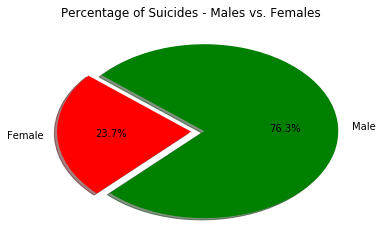

In [27]:
labels = ['Female','Male']
colors = ['Red', 'Green']
plt.pie(sex_gp_df, labels=labels, explode=(0,0.1), colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Percentage of Suicides - Males vs. Females')
plt.show


In [15]:
#gropby total per age group
#usable for bar chart
age_group = data.groupby(['age', 'sex'])

age_gp_df = pd.DataFrame(age_group.sum())
age_gp_df.drop(columns={'year','population'}, inplace=True)
age_gp_df['suicides_no'] = age_gp_df['suicides_no'].astype('int')
age_gp_df.reset_index(inplace=True)
age_gp_df

,age,sex,suicides_no
0,15-24 years,female,218309
1,15-24 years,male,757391
2,25-34 years,female,256427
3,25-34 years,male,1104353
4,35-54 years,female,607420
5,35-54 years,male,2280320
6,5-14 years,female,20152
7,5-14 years,male,42168
8,55-74 years,female,528359
9,55-74 years,male,1426791


<function matplotlib.pyplot.show(*args, **kw)>

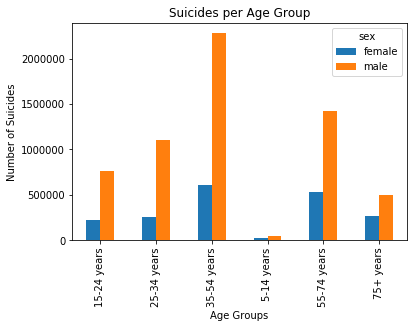

In [30]:
#Bar chart for suicides by age group
ax = age_gp_df.pivot(index='age',columns='sex', values='suicides_no').plot(kind='bar')

plt.title('Suicides per Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Number of Suicides')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

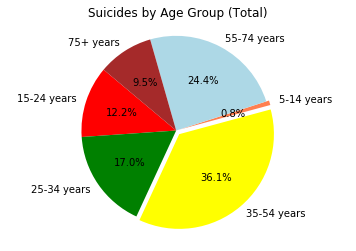

In [40]:
#Total suicide rate per age group
gp_age_grouped= data.groupby('age')
gp_age_df_sum = gp_age_grouped.sum()
gp_age_df_sum.reset_index(inplace=True)

labels = gp_age_df_sum['age']
colors = ['Red', 'Green', 'Yellow', 'Coral', 'Lightblue', 'Brown']
plt.pie(gp_age_df_sum['suicides_no'], labels=labels, explode=(0,0,0.05,0.03,0,0), colors=colors, autopct="%1.1f%%", shadow=False, startangle=140)
plt.title('Suicides by Age Group (Total)')
plt.axis('equal')
plt.show



In [20]:

#Males suicide rate per age group

males = data[data["sex"]=="male"]
males_suicide = males.groupby(['age']).sum()['suicides_no']
males_suicide = pd.DataFrame(males_suicide)
males_suicide

,suicides_no
age,
15-24 years,757391.0
25-34 years,1104353.0
35-54 years,2280320.0
5-14 years,42168.0
55-74 years,1426791.0
75+ years,493150.0


<function matplotlib.pyplot.show(*args, **kw)>

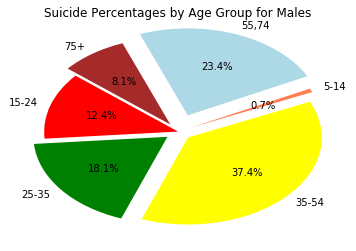

In [43]:
labels = ['15-24', '25-35', '35-54', '5-14', '55,74', '75+']
colors = ['Red', 'Green', 'Yellow', 'Coral', 'Lightblue', 'Brown']
plt.pie(males_suicide, labels=labels, explode=(0,0.1,0.1,0.1,0.2,0.1), colors=colors, autopct="%1.1f%%", shadow=False, startangle=140)
plt.title('Suicide Percentages by Age Group for Males')
plt.show

In [22]:
#females suicide rate per age group

females = data[data["sex"]=="female"]
females_suicide = females.groupby(['age']).sum()['suicides_no']
females_suicide = pd.DataFrame(females_suicide)
females_suicide

,suicides_no
age,
15-24 years,218309.0
25-34 years,256427.0
35-54 years,607420.0
5-14 years,20152.0
55-74 years,528359.0
75+ years,263627.0


<function matplotlib.pyplot.show(*args, **kw)>

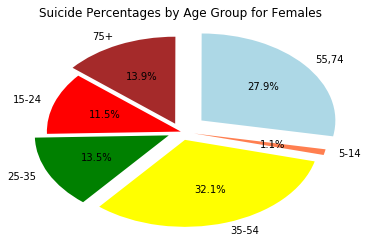

In [44]:


labels = ['15-24', '25-35', '35-54', '5-14', '55,74', '75+']
colors = ['Red', 'Green', 'Yellow', 'Coral', 'Lightblue', 'Brown']
plt.pie(females_suicide, labels=labels, explode=(0,0.1,0.1,0.1,0.2,0.1), colors=colors, autopct="%1.1f%%", shadow=False, startangle=140)
plt.title('Suicide Percentages by Age Group for Females')
plt.show

In [66]:
#group by countries Female
females = data[data["sex"]=="female"]
females_suicide = females.groupby(['country']).sum()['suicides_no']
females_suicide = pd.DataFrame(females_suicide)

females_suicide.sort_values(by='suicides_no', ascending=False, inplace= True)
top_f = females_suicide.head(15)
# top_f.reset_index(inplace=True)
top_f

,suicides_no
country,
Japan,298333.0
Russian Federation,279518.0
United States of America,253609.0
France,108619.0
Republic of Korea,82615.0
Germany,79707.0
Ukraine,71609.0
Brazil,55951.0
United Kingdom,43379.0


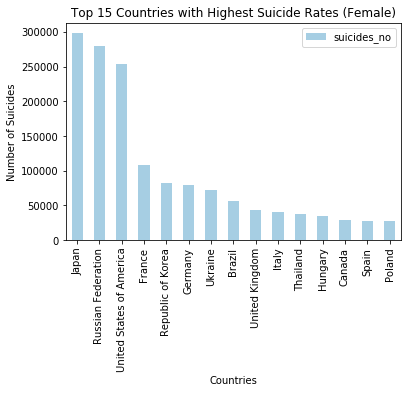

In [78]:
#Bar chart for Countries Female
ax = top_f.plot(kind="bar",colormap='Paired')

plt.title('Top 15 Countries with Highest Suicide Rates (Female)')
plt.xlabel('Countries')
plt.ylabel('Number of Suicides')
plt.show()

In [81]:
#group by countries MAles
females = data[data["sex"]=="male"]
females_suicide = females.groupby(['country']).sum()['suicides_no']
females_suicide = pd.DataFrame(females_suicide)

females_suicide.sort_values(by='suicides_no', ascending=False, inplace= True)
top_f = females_suicide.head(15)
# top_f.reset_index(inplace=True)
top_f

,suicides_no
country,
Russian Federation,1221474.0
United States of America,947792.0
Japan,639281.0
Ukraine,293561.0
France,286881.0
Germany,211555.0
Brazil,194873.0
Republic of Korea,179115.0
Poland,145589.0


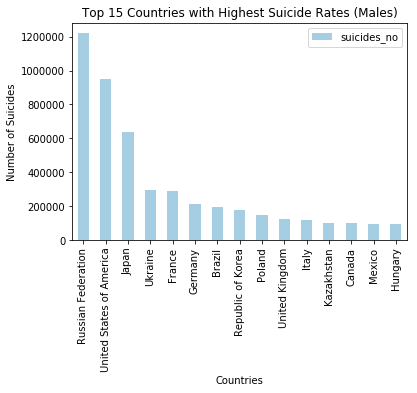

In [82]:
#Bar chart for Countries Male
ax = top_f.plot(kind="bar",colormap='Paired')

plt.title('Top 15 Countries with Highest Suicide Rates (Male)')
plt.xlabel('Countries')
plt.ylabel('Number of Suicides')
plt.show()

In [185]:
#groups by year
year_group = data.groupby(['year','sex'])

yeardf=year_group.sum()
yeardf.drop(columns={'population'},inplace=True)
yeardf.reset_index(inplace=True
                  )
year_males = yeardf[yeardf["sex"]=="male"]
year_males
year_fe = yeardf[yeardf["sex"]=="female"]

year_fe.head()

,year,sex,suicides_no
0,1979,female,29418
2,1980,female,42629
4,1981,female,47448
6,1982,female,47564
8,1983,female,34759


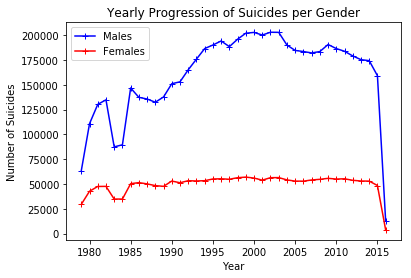

In [140]:
#line Chart for each year
males, = plt.plot(year_males['year'], year_males['suicides_no'], marker ='+', color='blue', label="Males")
females, = plt.plot(year_fe['year'], year_fe['suicides_no'], marker ='+', color='red', label="Females")

plt.title("Yearly Progression of Suicides per Gender")
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.legend(handles=[males,females], loc="best")
plt.draw()
plt.show()

In [196]:
#scatter total number each country each year
cy_group = data.groupby(['year','country'])

cysum=cy_group.sum()
cysum.reset_index(inplace = True)
cysum.head()

,year,country,suicides_no,population
0,1979,Argentina,1802,24986000
1,1979,Australia,1675,13279400
2,1979,Barbados,2,36500
3,1979,Belgium,2114,9249500
4,1979,Brazil,3459,102206100


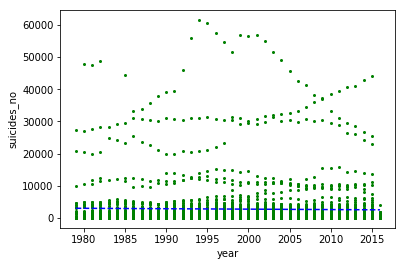

In [198]:
#plot scatter
cysum.plot.scatter(x='year',y='suicides_no',s=4, color='rae')

(slope, intercept, _, _, _) = linregress(cysum['year'], cysum['suicides_no'])
fit = slope * cysum['year'] + intercept
plt.plot(cysum['year'], fit, 'b--')
plt.show()